In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

plt.rcParams['figure.figsize'] = (12, 10)

sns.set()

In [2]:
movie_df = pd.read_csv('movies.csv')

In [3]:
genre2count = defaultdict(int)

genre_set = set()
for genre_str in movie_df['genres']:
    genre_lst = genre_str.split('|')
    for genre in genre_lst:
        genre_set.add(genre)
        genre2count[genre] += 1

In [4]:
# The number of movies with no genre

sum(movie_df['genres'] == '(no genres listed)')

34

In [5]:
ignored_genre_set = {'IMAX', '(no genres listed)', 'Film-Noir'}

for genre in ignored_genre_set:
    genre_set.remove(genre)
    del genre2count[genre]

In [6]:
genre_set

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [7]:
with open('genre.txt', 'w') as file:
    for genre in genre_set:
        file.write(f'{genre}\n')

In [146]:
len(genre_set)

18

In [147]:
genre2count

defaultdict(int,
            {'Adventure': 1263,
             'Animation': 611,
             'Children': 664,
             'Comedy': 3756,
             'Fantasy': 779,
             'Romance': 1596,
             'Drama': 4361,
             'Action': 1828,
             'Crime': 1199,
             'Thriller': 1894,
             'Horror': 978,
             'Mystery': 573,
             'Sci-Fi': 980,
             'War': 382,
             'Musical': 334,
             'Documentary': 440,
             'Western': 167,
             'Film-Noir': 87})

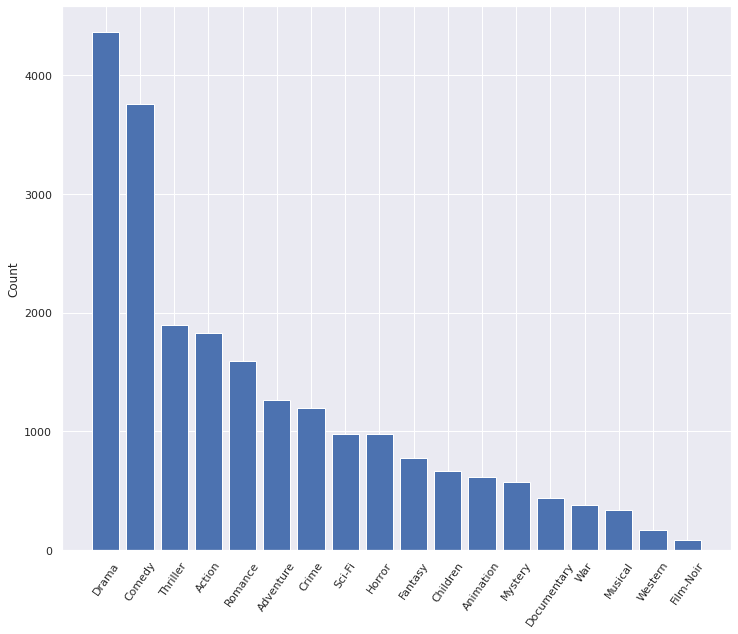

In [148]:
countgenre_pairs = [(value, key) for key, value in genre2count.items()]
countgenre_pairs.sort(reverse=True)

y, x = zip(*countgenre_pairs)

plt.xticks(rotation=55, ha='center')
plt.bar(x, y)
plt.ylabel('Count')
plt.show()

In [175]:
cooccurence_df = pd.DataFrame(0.0, index=genre_set, columns=genre_set)

cooccurence_count = defaultdict(int)
for genre_str in movie_df['genres']:
    genre_lst = genre_str.split('|')
    for genre in ignored_genre_set:
        if genre in genre_lst:
            genre_lst.remove(genre)
    for x, y in itertools.combinations(genre_lst, 2):
        cooccurence_count[(x, y)] += 1

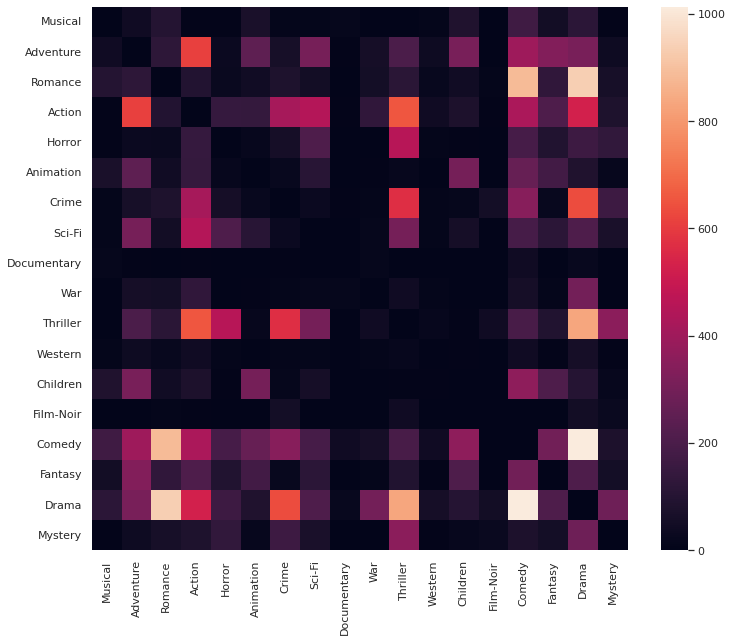

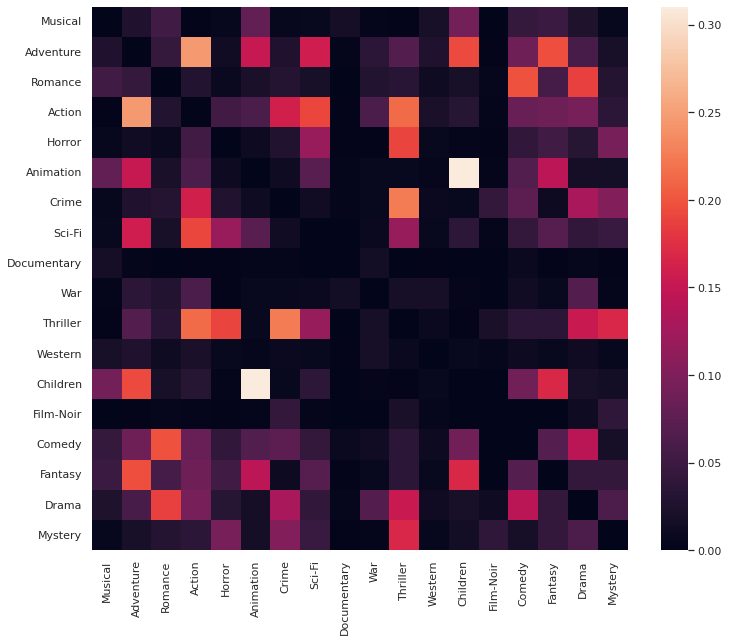

In [176]:
for key, value in cooccurence_count.items():
    genre_x, genre_y = key
    cooccurence_df[genre_x][genre_y] += value
    cooccurence_df[genre_y][genre_x] += value

sns.heatmap(cooccurence_df)
plt.show()

for genre_x, genre_y in itertools.combinations(genre_set, 2):
    intersection_count = cooccurence_df[genre_x][genre_y]
    union_count = genre2count[genre_x] + genre2count[genre_y] - cooccurence_df[genre_x][genre_y]
    jaccard = intersection_count / union_count
    cooccurence_df[genre_x][genre_y] = jaccard
    cooccurence_df[genre_y][genre_x] = jaccard
for genre in genre_set:
    cooccurence_df[genre][genre] = 0
    
sns.heatmap(cooccurence_df)
plt.show()